# Assignment 2
## Chicago Crime Detection

In [2]:
import pandas as pd

In [35]:
df = pd.read_csv('Chicago_Crime_Detective.csv', index_col = 0)

/home/mridul2899/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


In [37]:
df.dtypes

ID                      int64
Date                   object
LocationDescription    object
Arrest                   bool
Domestic                 bool
Beat                    int64
District               object
CommunityArea          object
Year                    int64
dtype: object

In [38]:
df['Date'].value_counts()

5/16/08 0:00      11
4/13/04 21:00     10
10/17/01 22:00    10
9/17/05 22:00     10
3/28/02 22:00      9
                  ..
9/20/12 12:00      1
5/10/03 15:00      1
6/11/02 21:30      1
10/2/09 3:59       1
6/25/06 13:30      1
Name: Date, Length: 131680, dtype: int64

In [39]:
df['Date'] = pd.to_datetime(df['Date'])

In [40]:
df.dtypes

ID                              int64
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                       object
CommunityArea                  object
Year                            int64
dtype: object

In [43]:
df.sort_values('Date', ascending = False)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012
...,...,...,...,...,...,...,...,...,...
191636,1310068,2001-01-01 00:05:00,STREET,False,False,1123,NaN,NaN,2001
191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001
191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001
191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001


In [61]:
(len(df) // 2) * 2

191640

In [49]:
df.Date[len(df) // 2]

Timestamp('2006-05-21 12:30:00')

In [62]:
df['Month'] = df.apply(lambda row: row.Date.month, axis = 1)

In [63]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12


In [67]:
df['Month'].value_counts()

10    17086
7     16801
8     16572
12    16426
11    16063
9     16060
1     16047
5     16035
6     16002
3     15758
4     15280
2     13511
Name: Month, dtype: int64

In [75]:
df['Weekday'] = df.apply(lambda row: row.Date.dayofweek, axis = 1)

In [76]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,Weekday
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,0
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,0
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,0
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,0
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,0


In [77]:
df.Weekday.value_counts()

4    29284
2    27416
0    27397
3    27319
5    27118
1    26791
6    26316
Name: Weekday, dtype: int64

In [79]:
df['Month'][df['Arrest'] == True].value_counts()

1     1435
12    1397
10    1342
8     1329
7     1324
3     1298
11    1256
4     1252
9     1248
2     1238
6     1230
5     1187
Name: Month, dtype: int64

In [80]:
len(df[df['Arrest'] == True])

15536

In [81]:
df['Year'] = df.apply(lambda row: row.Date.year, axis = 1)

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

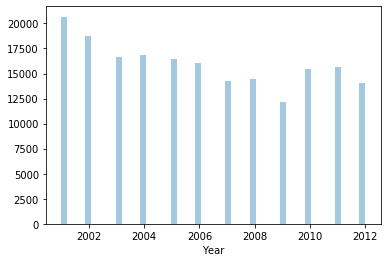

In [84]:
sns.distplot(df.Year, kde = False)

In [85]:
df.Year.value_counts()

2001    20669
2002    18753
2004    16862
2003    16657
2005    16484
2006    16098
2011    15637
2010    15497
2008    14445
2007    14280
2012    14092
2009    12167
Name: Year, dtype: int64

In [90]:
arrests_per_year = df['Year'][df['Arrest'] == True].value_counts().to_list()
arrests_per_year

[2152, 2115, 1798, 1693, 1528, 1302, 1212, 1020, 840, 701, 625, 550]

In [88]:
import numpy as np

In [91]:
np.sum(arrests_per_year[:6])

10588

In [92]:
np.sum(arrests_per_year[6:])

4948

In [93]:
len(df)

191641

In [94]:
df.Arrest.describe()

count     191641
unique         2
top        False
freq      176105
Name: Arrest, dtype: object

In [96]:
len(df[(df.Year == 2001) & (df.Arrest == True)]) / len(df[df.Year == 2001])

0.10411727708161982

In [99]:
round(len(df[(df.Year == 2007) & (df.Arrest == True)]) / len(df[df.Year == 2007]), ndigits = 2)

0.08

In [100]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,Weekday
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,0
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,0
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12,0
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,0
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,0


In [107]:
locations = df.LocationDescription.value_counts()[:6]

In [108]:
locations

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

In [111]:
locations = locations.drop('OTHER')

In [116]:
locations = locations.keys().to_list()

In [117]:
locations

['STREET',
 'PARKING LOT/GARAGE(NON.RESID.)',
 'ALLEY',
 'GAS STATION',
 'DRIVEWAY - RESIDENTIAL']

In [120]:
Top5 = df[df['LocationDescription'].isin(locations)]

In [121]:
Top5

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Month,Weekday
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12,0
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12,0
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12,0
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12,0
5,8950793,2012-12-31 20:30:00,STREET,True,False,2521,25,19,2012,12,0
...,...,...,...,...,...,...,...,...,...,...,...
191636,1310068,2001-01-01 00:05:00,STREET,False,False,1123,NaN,NaN,2001,1,0
191637,1313404,2001-01-01 00:01:00,STREET,False,False,2023,NaN,NaN,2001,1,0
191638,1313442,2001-01-01 00:01:00,STREET,False,False,911,NaN,NaN,2001,1,0
191639,1563324,2001-01-01 00:01:00,STREET,False,False,1712,NaN,NaN,2001,1,0


In [122]:
df['Weekday'][df['LocationDescription'] == 'GAS STATION'].value_counts()

5    338
6    336
4    332
3    282
0    280
2    273
1    270
Name: Weekday, dtype: int64